# INTRODUCTION

This project covers different answers filled by people on a online dating application named OKCupid. In the field of dating site and love matching, data science is a efficient and powerful way to discover pattern and find good matching partners.

The goal of this project is to scope, prepare, analyze and create a machine learning model using the data provided by Codecademy.

#### Data source :
profiles.csv (from :Codecademy.com)

## Scoping:
 
 
 
### Project Goals
 
The main goal of this project is to use machine learning to answer one important question. Since many people are interesting in the astrological sign of the other person when dating, this project will be evaluating the ability to predict with accuracy the unknown astrological signs using all the other given personal information of that person. 

Question: Is it possible to build a machine learning model that can predict with great accuracy the astrological signs in the OKCupid data.
 
### Data   
 
All the data used in this project comes from Codecademy.com in the file named profiles.csv. The data is structured in a way that each column is a question about the person and each row represents all the anwsers to each question. Unfortunately, some questions are left empty and this why we will use a machine learning model to fill the missing anwsers.  
 
### Analysis
 
Descriptive statistics will be us and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented.
 
### Evaluation
   
   
Finally, the machine learning model used will be evaluated based on the output that it predicts. To verify the prediction accuracy, the predictions will be tested by metrics like accuracy, recall, F1, Kappa Score and a confusion matix.
 
 

# Importing Python Modules

Import the required python modules for the project.

In [269]:
# Libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# specific to the project

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In this project the data used are located in the profiles.csv file. To get a better understanding and build graphics and models the data will be loaded as a dataframe named profiles.

In [270]:
# Loading data & naming it profile

profiles = pd.read_csv("profiles.csv")
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


### Data Meaning:
The columns in the dataset include:
 

age: continuous variable of age of user

body_type: categorical variable of body type of user

diet: categorical variable of dietary information

drinks: categorical variable of alcohol consumption

drugs: categorical variable of drug usage

education: categorical variable of educational attainment

ethnicity: categorical variable of ethnic backgrounds

height: continuous variable of height of user

income: continuous variable of income of user

job: categorical variable of employment description

offspring: categorical variable of children status

orientation: categorical variable of sexual orientation

pets: categorical variable of pet preferences

religion: categorical variable of religious background

sex: categorical variable of gender

sign: categorical variable of astrological symbol

smokes: categorical variable of smoking consumption

speaks: categorical variable of language spoken

status: categorical variable of relationship status

last_online: date variable of last login

location: categorical variable of user locations



And a set of open short-answer responses to :


essay0: My self summary

essay1: What I’m doing with my life

essay2: I’m really good at

essay3: The first thing people usually notice about me

essay4: Favorite books, movies, show, music, and food

essay5: The six things I could never do without

essay6: I spend a lot of time thinking about

essay7: On a typical Friday night I am

essay8: The most private thing I am willing to admit

essay9: You should message me if…

In [271]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

# Exploring Data

The main question is focusing on the astrological signs but prior exploration is required before any data preparation, graphic visualization and  model creation. This section will explore the column sign column and the values in each row.

In [272]:
print("number of unique answer:", profiles.sign.nunique())
print("each different anwser:", profiles.sign.unique())

number of unique answer: 48
each different anwser: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'a

### Cleaning data

To facilitate the analysis, cleaning the data only keeping unique values will reduce the complexity and increase the speed of the analysis.
(Only the sign, the first word of the answer, will be used and the description following will be dropped.)

In [273]:
# cleaning code
profiles["clean_sign"] = profiles.sign.str.split().str.get(0)

# NEW number of unique answer & each different answers
print("number of unique answer:", profiles.clean_sign.nunique())
print("each different anwser:", profiles.clean_sign.unique())

profiles.clean_sign.value_counts()

number of unique answer: 12
each different anwser: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: clean_sign, dtype: int64

### Discrete Variables

#### Sex

Previously, it was identified that there are more males in the data, and it seems that there are ~35,000 men to ~25,000 women.

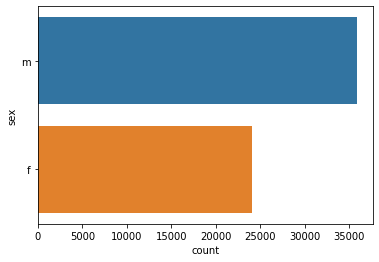

In [274]:
sns.countplot(data=profiles, y="sex");

#### Body Type

The next chart shows the body type variable, and it seems that most users will describe themselves as average, fit, or athletic.

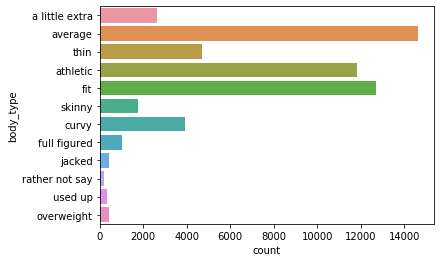

In [275]:
sns.countplot(data=profiles, y="body_type");

The next chart shows the break down of body type by gender and it seems that some of the body type descriptions are highly gendered. For example "curvy" and "full figured" are highly female descriptions, while males use "a little extra", and "overweight" more often.

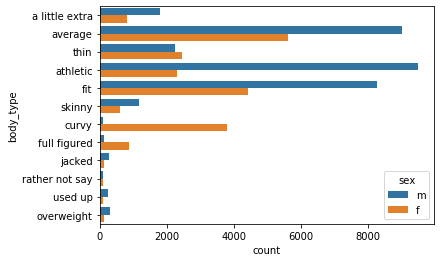

In [276]:
sns.countplot(data=profiles, y="body_type", hue = "sex");

#### Diet

Here is a chart of the dietary information for users. Most user eat "mostly anything", followed by "anything", and "strictly anything", being open-minded seems to be a popular signal to potential partners. 

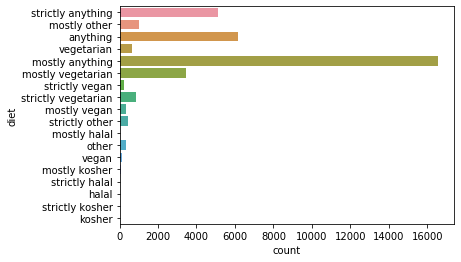

In [277]:
sns.countplot(data=profiles, y="diet");

#### Drinks

The next plot shows that the majority of the users drink "socially", then "rarely" and "often". 

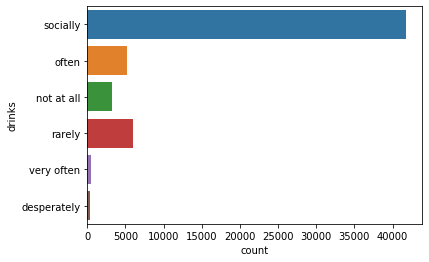

In [278]:
sns.countplot(data=profiles, y="drinks");

#### Drugs

The vast majority of users "never" use drugs. 

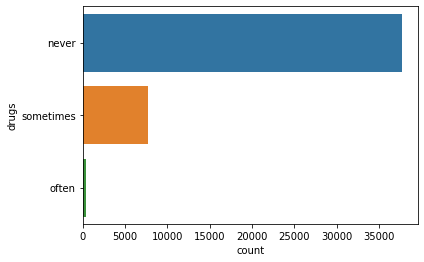

In [279]:
sns.countplot(data=profiles, y="drugs");

#### Education

Below you can see the majority of users are graduate from college/university followed by masters programs and those working on college/university. Interestingly space camp related options are fairly a popular options.

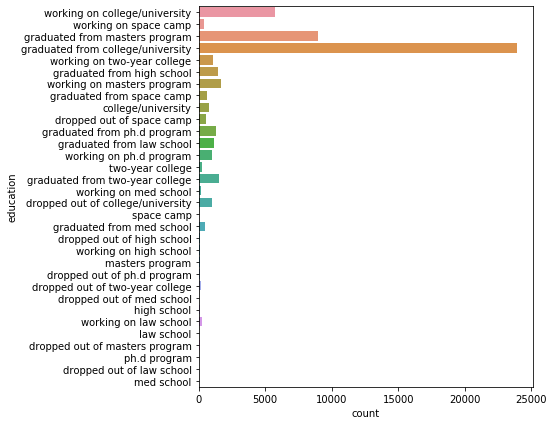

In [280]:
plt.figure(figsize=(6,7))

sns.countplot(data=profiles, y="education");

#### Jobs

Most users don't fit into the categories provided, but there are a fair share of students, artists, tech, and business folks. 

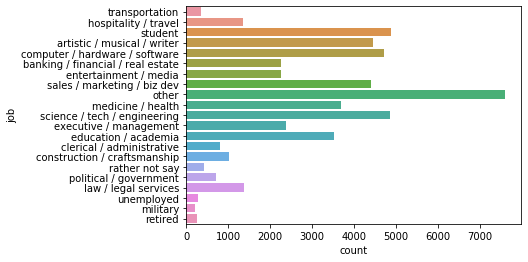

In [281]:
sns.countplot(data=profiles, y="job");

#### Offspring

The data suggest that most users do not have kids. 

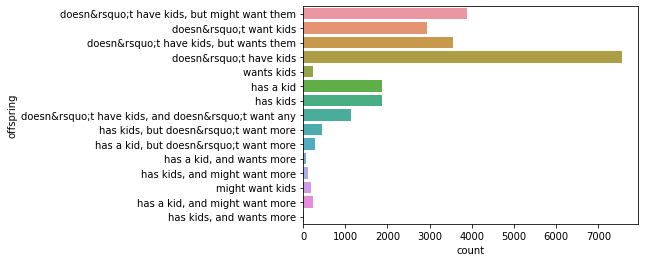

In [282]:
sns.countplot(data=profiles, y="offspring");

#### Orientation

The majority of users are straight.

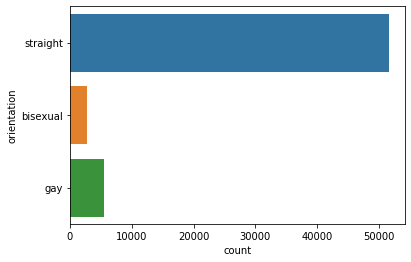

In [283]:
sns.countplot(data=profiles, y="orientation");

interestingly the majority of bisexual users re female. 

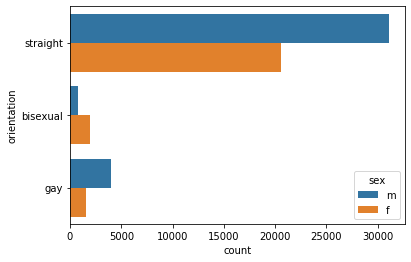

In [284]:
sns.countplot(data=profiles, y="orientation", hue = "sex");

#### Pets

The chart shows that most users like or has dogs.

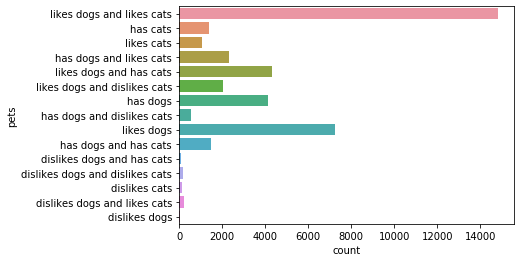

In [285]:
sns.countplot(data=profiles, y="pets");

#### Religion

Religion was similar to sign where there are a lot of qualifiers.

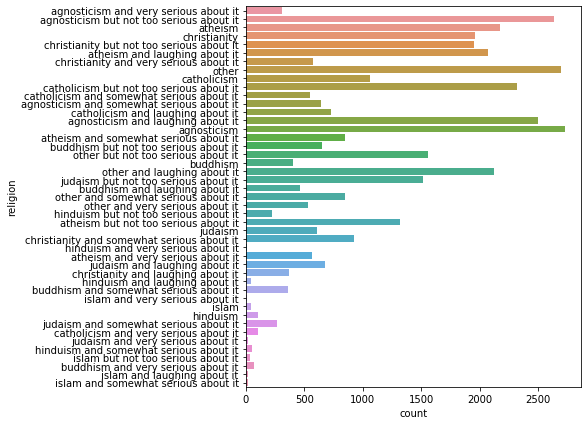

In [286]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="religion");

religion was cleaned to take the first word and distilled down to 9 groups. The majority was not very religious identifying as agnostic, other, or atheists. 

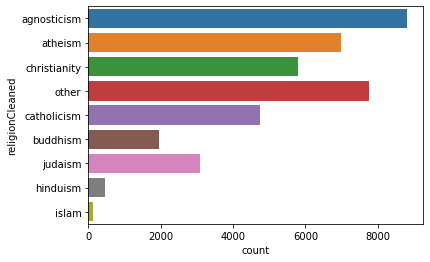

In [287]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religionCleaned");

#### Smoking

Similarly for drugs the majority of users chose "no" for smoking.

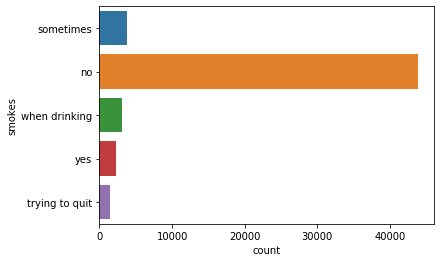

In [288]:
sns.countplot(data=profiles, y="smokes");

#### Status

The relationship status for a dating website is fairly predictable. One would assume that most people are single and available which is reflected in the data.

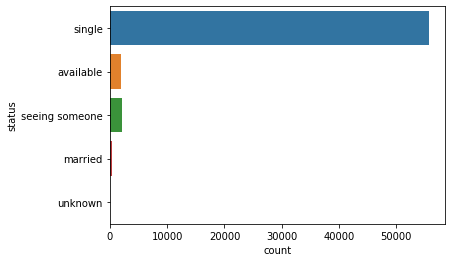

In [289]:
sns.countplot(data=profiles, y="status");

#### Signs ( main priority)

Here are the astrological signs of the users. There are mainly evenly distributed with Capricorns being the rarest and Leos being the most common.

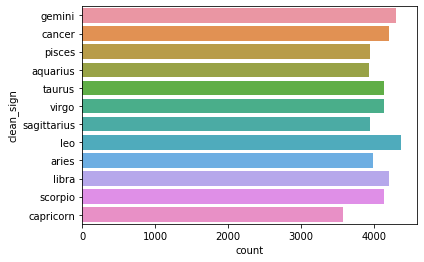

In [290]:
sns.countplot(data=profiles, y="clean_sign");

# Preparation

### Missing Data

This section will prepare the data by checking for any empty (nan) values and change them if possible or remove them completely to train the machine learning model properly.

In [291]:
profiles.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
clean_sign         11056
religionCleaned    20226
dtype: int64

### Preprosessing

To make the model more accurate, quicker and more precise it is needed to drop the (nan) values. This way the machine learning model will be more reliable having more complete information to work with.

Also, some columns are not helping in the prediction of the sign and for this reason they will be completely remove like the column "age", "drink" and other columns.

In [292]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       'sex', 'job', 'clean_sign']
df = profiles[cols].dropna()
df.shape

(16453, 8)

#### Dummy Variables

To be able to use the values of the chosen columns, dummy variables are created to deal with the categorical variables. Dummy variables will turn the categories having string variable into its own binary identifier. The data now has 81 columns to predict signs. 

In [293]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [294]:
print(df.head())

    clean_sign  body_type_a little extra  body_type_athletic  \
0       gemini                         1                   0   
1       cancer                         0                   0   
5       taurus                         0                   0   
7  sagittarius                         0                   0   
9       cancer                         0                   1   

   body_type_average  body_type_curvy  body_type_fit  body_type_full figured  \
0                  0                0              0                       0   
1                  1                0              0                       0   
5                  1                0              0                       0   
7                  1                0              0                       0   
9                  0                0              0                       0   

   body_type_jacked  body_type_overweight  body_type_rather not say  ...  \
0                 0                     0                 

### Label Imbalance

To make sure the machine learning is working properly, the balance or imbalannce in the data should be verified. To get the best predictions it is best if the response variable is in balance meaning that there isn't one or a few columns havinng very little occurence which could cause problems to the model. Once this is checked, it is important to have enough data to train the machine learning model to get good predictions.

In the atrological sign column, which will be the labels in the model, there is no significant difference between each column when comparing the number of value.

In [295]:
df.clean_sign.value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: clean_sign, dtype: int64

### Splitting Data

To train and test the model it is needed to first split all the data into two groups. The first group being the training group which will be the data training the model. The second group being the testing group which will verify how good the model is at predicting signs. 

In this section, 75% of the data will be used for the training group and the rest (25%) will be used for the testing group.

In [314]:
# importing library to split the data
from sklearn.model_selection import train_test_split

# cerating the set and the label
col_length = len(df.columns)
x = df.iloc[:, 1:col_length]
y = df.iloc[:, 0:1]

training_set, testing_set, training_label, testing_label = train_test_split(x, y, test_size = 0.25, random_state = 1)

# #making 1 dimension array
# training_label = training_label.to_numpy().ravel()
# testing_label = testing_label.to_numpy().ravel()

# Models & Predictions


## Model Building

To build the machine learning model different algorithms will be used to make predictions.

This model will use modules for Logistic Regression, Decision Trees and KNN.

In [315]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Metrics and Evaluations

Accuracy: measures the effectiveness of the prediction.

Precision: measures the percentage of right prediction for all positive labels predicted.

Recall: measures the percentage of relevent items that your classifier found.

F1-score: is a blended score of precision and recall which balances both values.

Macro Avg: is the unweighted mean value of precision and recall.

Weighted Avg: is the weighted mean value of precision and recall by the support values for each class.

Support: is the number of observations in class to predict.

### Logistic Regression model

This model will use logistic regressoin with the following argument (multi_class = "multinomial").

First, the model will be trained with the training data and then a prediction will be made.

In [320]:
regression_model = LogisticRegression(multi_class="multinomial",  solver='newton-cg').fit(training_set,training_label)
regression_model_prediction = regression_model.predict(training_set)

The model has a very bad accuracy which is 12%. There is almost a similar probability to predict the answer randomly ( 1/12 = around 8% ) which makes the model not really useful.

In [326]:
from sklearn.metrics import classification_report
print(classification_report(training_label, regression_model_prediction))

              precision    recall  f1-score   support

    aquarius       0.12      0.07      0.09       936
       aries       0.13      0.12      0.12      1017
      cancer       0.12      0.13      0.13      1072
   capricorn       0.15      0.03      0.05       905
      gemini       0.13      0.17      0.15      1114
         leo       0.13      0.20      0.16      1123
       libra       0.12      0.14      0.13      1054
      pisces       0.13      0.11      0.12       980
 sagittarius       0.12      0.11      0.11       982
     scorpio       0.13      0.08      0.10      1001
      taurus       0.11      0.10      0.10      1045
       virgo       0.13      0.20      0.15      1110

    accuracy                           0.12     12339
   macro avg       0.13      0.12      0.12     12339
weighted avg       0.13      0.12      0.12     12339



### K Nearest Neighbor

The next model is the KNeighborsClassifier which will take 20 of it's neighbors to predict the signs. The default value for n_neighbors is 5 which was kept. This number can be tuned later on if needed. This model had a 33% accuracy which is a good sign.

In [331]:
KNN_model = KNeighborsClassifier(n_neighbors = 5).fit(training_set, training_label)
KNN_model_prediction = KNN_model.predict(training_set)

In [332]:
print(classification_report(training_label, KNN_model_prediction))

              precision    recall  f1-score   support

    aquarius       0.25      0.64      0.36       936
       aries       0.26      0.55      0.35      1017
      cancer       0.30      0.41      0.35      1072
   capricorn       0.33      0.34      0.34       905
      gemini       0.36      0.33      0.34      1114
         leo       0.40      0.30      0.35      1123
       libra       0.36      0.26      0.30      1054
      pisces       0.44      0.26      0.32       980
 sagittarius       0.42      0.20      0.28       982
     scorpio       0.39      0.22      0.28      1001
      taurus       0.43      0.23      0.30      1045
       virgo       0.43      0.21      0.28      1110

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



#### Decision Trees

For this model the default "max_depth" is "none". This way the model will expand each node until all leaves are pure or until all leaves have less than the minimum of the split samples

This model is the most accurate and way more reliable with a 78% accuracy.

In [333]:
tree_model = DecisionTreeClassifier().fit(training_set, training_label)
tree_model_prediction = tree_model.predict(training_set)

print(classification_report(training_label, tree_model_prediction))

              precision    recall  f1-score   support

    aquarius       0.64      0.94      0.76       936
       aries       0.68      0.89      0.77      1017
      cancer       0.68      0.86      0.76      1072
   capricorn       0.74      0.84      0.79       905
      gemini       0.77      0.81      0.79      1114
         leo       0.80      0.80      0.80      1123
       libra       0.81      0.76      0.78      1054
      pisces       0.84      0.72      0.78       980
 sagittarius       0.92      0.68      0.79       982
     scorpio       0.92      0.70      0.79      1001
      taurus       0.90      0.71      0.79      1045
       virgo       0.94      0.66      0.78      1110

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



### Confusion Matrix

This selction the confusion matrix will show the result of the true values on the y axis and predicted values on the x axis.

In the matrix the diagonals are lighter and have bigger numbers, this shows that the accuracy is going to be high because those are the (True Positives).

In [365]:
from sklearn.metrics import confusion_matrix

tree_cmatrix = confusion_matrix(training_label,tree_model_prediction)
tree_labels = tree_model.classes_

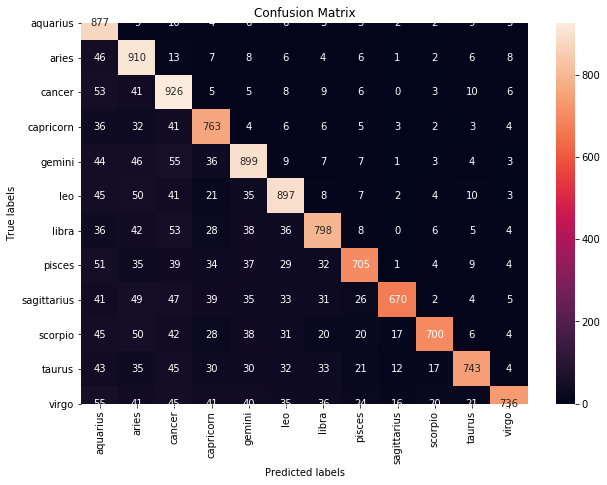

In [366]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(tree_cmatrix, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(tree_labels); 
ax.yaxis.set_ticklabels(tree_labels);

Going back to the model, a quick analysis will show that this tree model has a depth of 61 branches, which will probably not generalize to another dataset. In this case this model has been "overfit" for this data. 

In [367]:
tree_model.get_depth()

61

To make a point, a five fold cross validation is created with the same data. The results are worse than the KNN and about the Logistic Regression algorithms. the baseline was ~8.4%

In [368]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(tree_model, training_set, training_label, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08752026 0.07414911 0.0834684  0.08468395 0.08958249]
Baseline: 8.39% (0.53%)


The decision tree model will be made again, but with a `max_depth` of 20 to stop the algorithm from reaching the stopping point. The new accuracy rate of ~32% is worse than the first iteration and slightly under the KNN model. 

In [369]:
tree_model20 = DecisionTreeClassifier(max_depth = 20).fit(training_set, training_label)
tree_model_prediction20 = tree_model20.predict(training_set)

print(classification_report(training_label, tree_model_prediction20))

              precision    recall  f1-score   support

    aquarius       0.53      0.31      0.39       936
       aries       0.59      0.27      0.37      1017
      cancer       0.16      0.60      0.25      1072
   capricorn       0.58      0.28      0.37       905
      gemini       0.33      0.41      0.36      1114
         leo       0.47      0.31      0.38      1123
       libra       0.43      0.32      0.37      1054
      pisces       0.50      0.28      0.36       980
 sagittarius       0.58      0.22      0.32       982
     scorpio       0.25      0.29      0.27      1001
      taurus       0.45      0.27      0.34      1045
       virgo       0.31      0.32      0.31      1110

    accuracy                           0.32     12339
   macro avg       0.43      0.32      0.34     12339
weighted avg       0.43      0.32      0.34     12339



If we check again with cross validation, the new model is still averaging ~9% which is not very good. 

In [370]:
results20 = cross_val_score(tree_model20, training_set, training_label, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

[0.07941653 0.08306321 0.09278768 0.09076175 0.0952574 ]
Baseline: 8.83% (0.53%)


### Selected Model

The KNN Model seems to be the most useful predicting model for finding missing astrological signs in the data.

By testing the model with the testing data group the accuracy is ~9% which is not very good.

In [371]:
KNN_prediction_test = KNN_model.predict(testing_set) 
print(classification_report(testing_label, KNN_prediction_test))

              precision    recall  f1-score   support

    aquarius       0.08      0.21      0.12       326
       aries       0.09      0.21      0.13       311
      cancer       0.10      0.12      0.11       385
   capricorn       0.06      0.07      0.07       292
      gemini       0.10      0.09      0.10       382
         leo       0.11      0.07      0.09       393
       libra       0.09      0.07      0.08       300
      pisces       0.11      0.06      0.08       354
 sagittarius       0.10      0.05      0.07       330
     scorpio       0.08      0.05      0.06       355
      taurus       0.07      0.04      0.05       345
       virgo       0.13      0.08      0.10       341

    accuracy                           0.09      4114
   macro avg       0.10      0.09      0.09      4114
weighted avg       0.10      0.09      0.09      4114



The confusion matrix of the selected model for the best prediction shows clearly that Cancer, Gemini and  Leo was predicted most often, but was not super accurate since the vertical color band represents even distributed guesses mostly wrong and some correct.

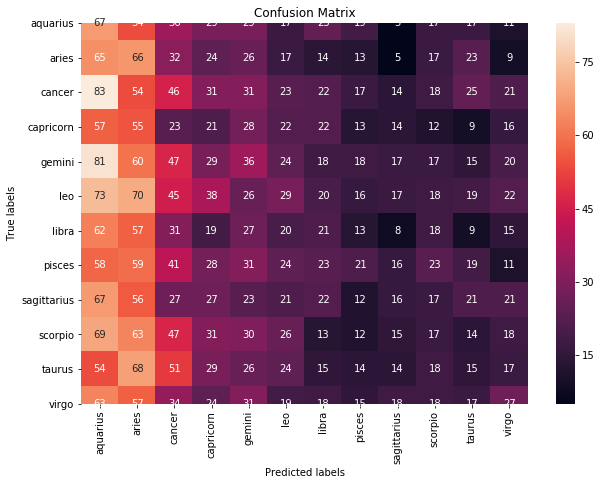

In [373]:
final_KNN_cmatrix = confusion_matrix(testing_label,KNN_prediction_test)
final_KNN_labels = KNN_model.classes_


plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_KNN_cmatrix, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(final_KNN_labels); 
ax.yaxis.set_ticklabels(final_KNN_labels);

### Conclusion


#### General Comments

In this project machine learning was used to predict the astrological signs of OkCupid users. This is an important feature since many people believe in astrology and matches between compatible star signs. If users don't input their signs, an algorithmic solution could have generated a sign to impute missing data when making matches.

Alas, the final selected algorithm did no better than basic guessing.


#### Next Steps 

Next steps will be to seriously consider whether it is possible to predict user's astrological signs period, or if there is a way to do with more data. Another possibility is to add additional models or tune the hyper parameters of the used models to see if any more predictive power could be squeezed out of the algorithms. 